# EDA: Exploratory Data Analysis

In [1]:
import os
from pathlib import Path

import numpy as np
import seaborn as sns

from src.config import Config
from src.data import load_news, load_price
from src.plots import plot_autocorrelation, plot_correlation_heatmap, plot_log_return_distribution, \
    plot_moving_averages, plot_ohlc_pairplot, plot_price_series, \
    plot_rolling_volatility

In [2]:
cfg = Config(Path("../config/config.yaml"))
sns.set_style("whitegrid")

In [3]:
price = load_price(Path(cfg.data.raw_dir) / cfg.data.name_prices)
news = load_news(Path(cfg.data.raw_dir) / cfg.data.name_news)

In [4]:
price.head()

,date,open,high,low,close,volume,adj_close
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [5]:
price

,date,open,high,low,close,volume,adj_close
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
1984,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
1985,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
1986,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1987,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [6]:
price.describe()

,date,open,high,low,close,volume,adj_close
count,1989,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,2012-07-20 11:52:23.891402752,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
min,2008-08-08 00:00:00,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,2010-07-30 00:00:00,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,2012-07-19 00:00:00,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,2014-07-14 00:00:00,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,2016-07-01 00:00:00,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625
std,NaN,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996


In [7]:
news.head()

,date,rank,headline
0,2008-08-08,top1,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-08,top13,"b""So---Russia and Georgia are at war and the N..."
2,2008-08-08,top18,"b'Condoleezza Rice: ""The US would not act to p..."
3,2008-08-08,top3,b'Russia Today: Columns of troops roll into So...
4,2008-08-08,top25,"b""No Help for Mexico's Kidnapping Surge"""


In [8]:
df = price.copy()
df["log_return"] = np.log(df["adj_close"] / df["adj_close"].shift(1))
os.makedirs(cfg.data.fig_dir, exist_ok=True)

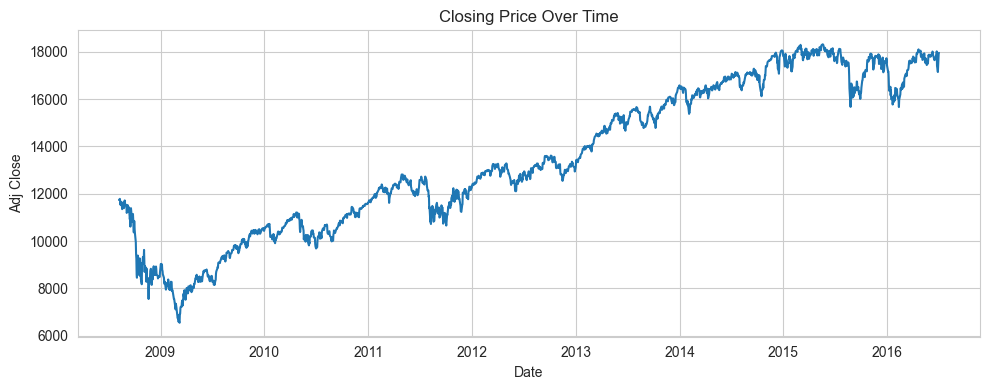

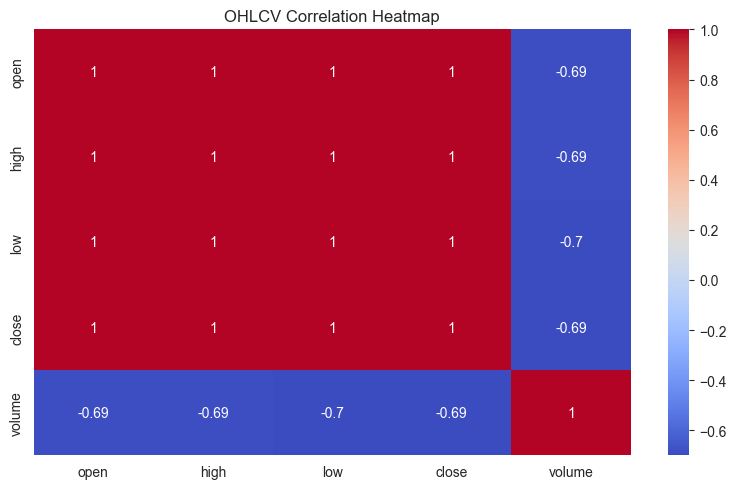

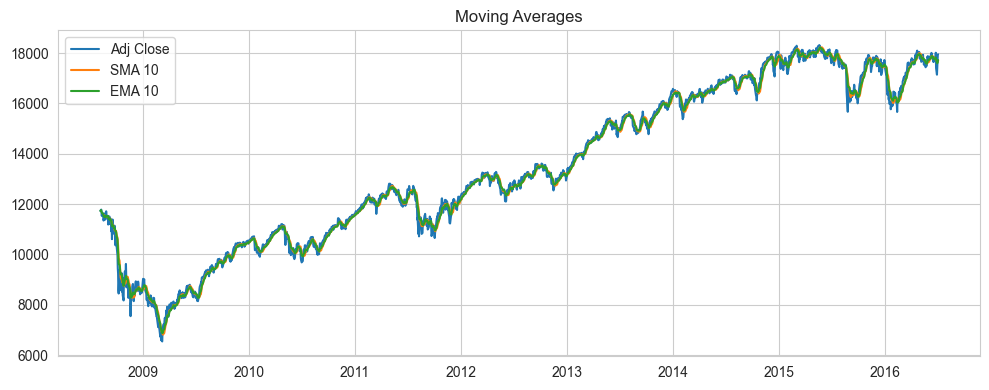

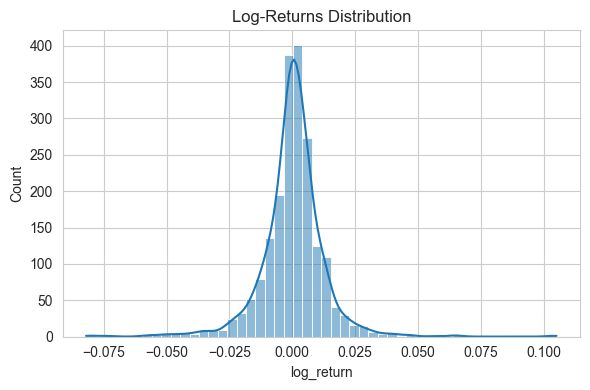

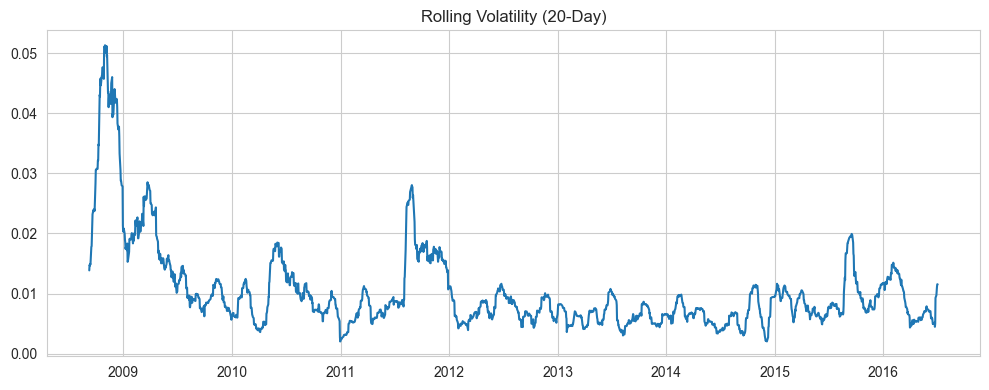

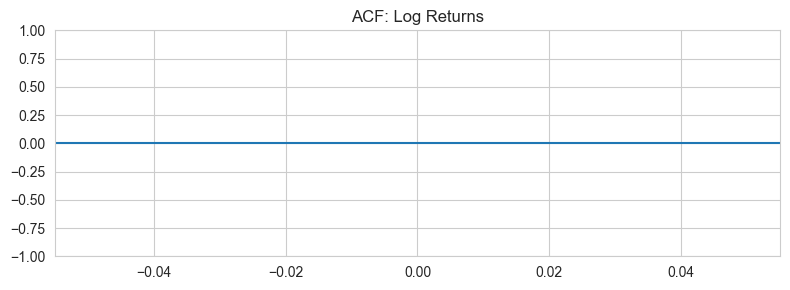

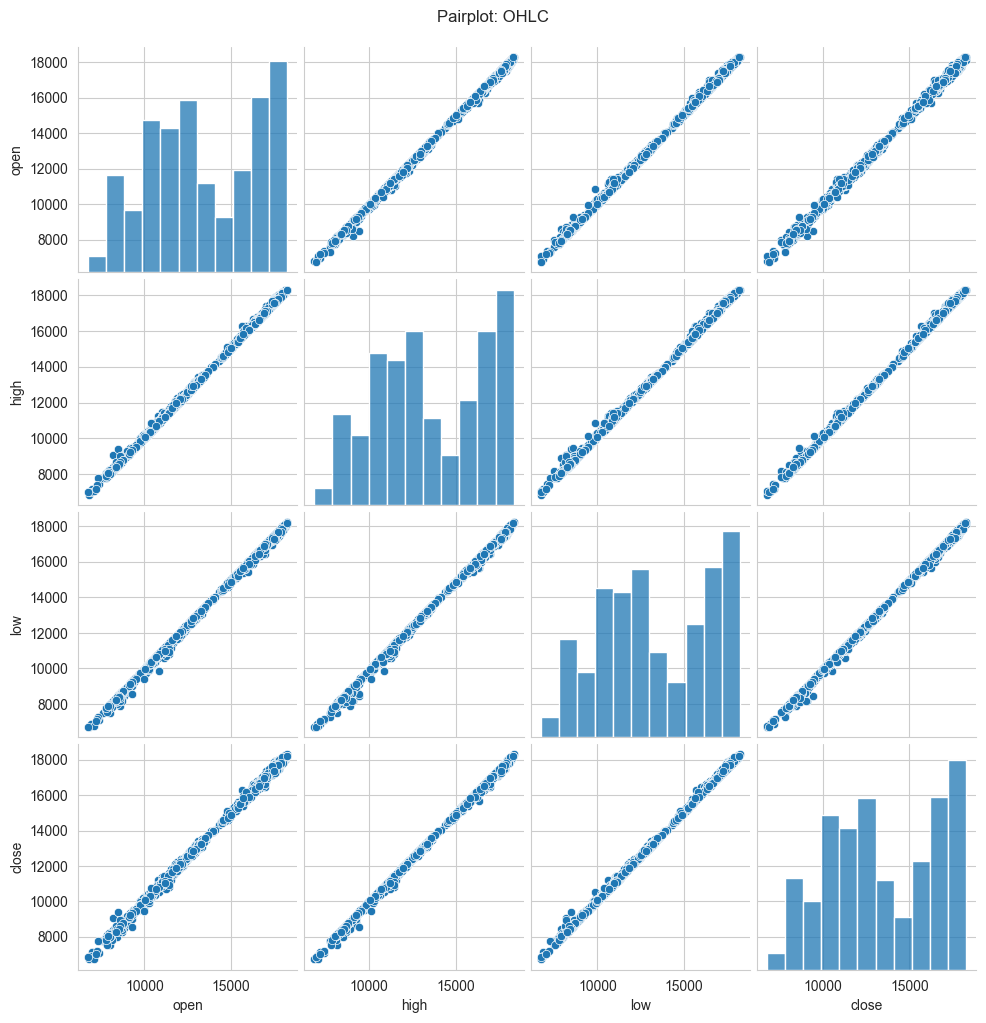

In [9]:
fig_dir = Path(cfg.data.fig_dir)

plot_price_series(df, fig_dir / "adj_close_price_series.png")
plot_correlation_heatmap(df, ["open", "high", "low", "close", "volume"], fig_dir / "ohclv_correlation_heatmap.png")
plot_moving_averages(df, fig_dir / "moving_averages.png")
plot_log_return_distribution(df, fig_dir / "log_return_distribution.png")
plot_rolling_volatility(df, fig_dir / "rolling_volatility.png")
plot_autocorrelation(df, fig_dir / "autocorrelation_returns.png")
plot_ohlc_pairplot(df, fig_dir / "ohlc_pairplot.png")